In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Taylor Series

Example: Expand $e^x$ to a third-order polynomial around $x=0$

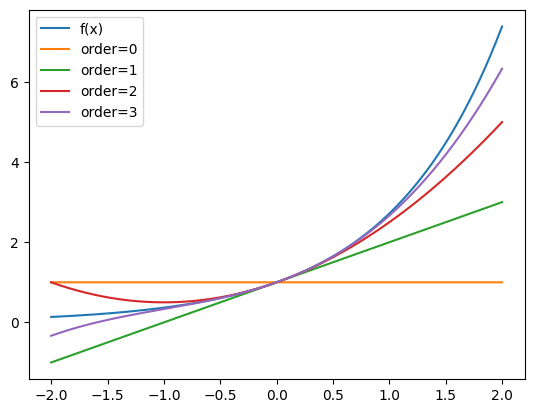

In [ ]:
x = np.arange(-2, 2, 0.001)
plt.plot(x, np.exp(x), label = 'f(x)')
# 0th order polynomial approximation: 1
plt.plot(x, np.repeat(1, len(x)), label = 'order=0')
# 1st order polynomial approximation: 1 + x (linear approximation)
plt.plot(x, 1 + x, label = 'order=1')
# 2nd order polynomial approximation: 1 + x + 1/2 x^2 (quadratic approximation)
plt.plot(x, 1 + x + 1/2 * x**2, label = 'order=2')
# 3rd order polynomial approximation: 1 + x + 1/2 x^2 + 1/6 x^3
plt.plot(x, 1 + x + 1/2 * x**2 + 1/6 * x**3, label = 'order=3')
plt.legend()

Expand $f(x) = \log(1+x)$ around $x = 0$ upto 3rd order

<ipython-input-6-aca7000b92e8>:2: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(1 + x), label = 'f(x)')


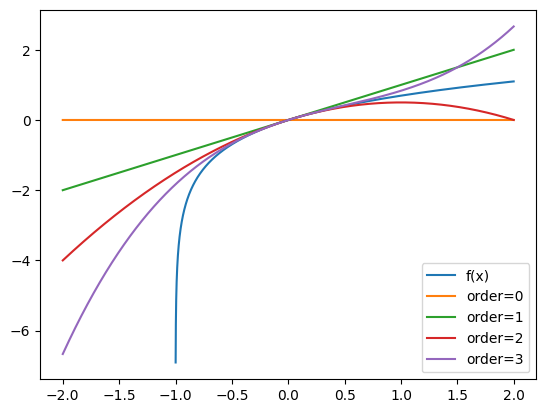

In [ ]:
x = np.arange(-2, 2, 0.001)
plt.plot(x, np.log(1 + x), label = 'f(x)')
# 0th order polynomial approximation: 1
plt.plot(x, np.repeat(0, len(x)), label = 'order=0')
# 1st order polynomial approximation: 1 + x (linear approximation)
plt.plot(x, x, label = 'order=1')
# 2nd order polynomial approximation: 1 + x + 1/2 x^2 (quadratic approximation)
plt.plot(x, x - 1/2 * x**2, label = 'order=2')
# 3rd order polynomial approximation: 1 + x + 1/2 x^2 + 1/6 x^3
plt.plot(x, x - 1/2 * x**2 + 1/3 * x**3, label = 'order=3')
plt.legend()

### Brownian Motion

In [ ]:
rng = np.random.default_rng()

In [2]:
# Definition of brownian motion
def gen_bm(dt = 0.0001, T= 1):
  t = np.arange(0, T + dt/2, dt)
  w = np.zeros(len(t))
  for i in range(1, len(w)):#index i denotes time
    w[i] = w[i-1] + rng.normal(loc = 0, scale = np.sqrt(dt))
  return (t, w)

Text(0.5, 0, 'Time')

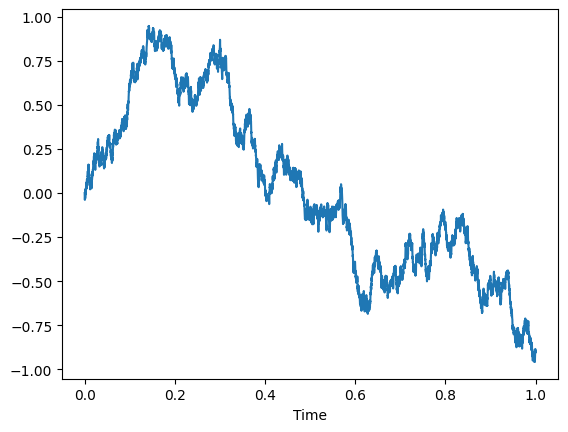

In [ ]:
t, w = gen_bm()
plt.plot(t, w)
plt.xlabel("Time")

Property: Variation of a Brownian Motion

In [ ]:
# Define a smooth function
def f(x):
  return np.exp(x)

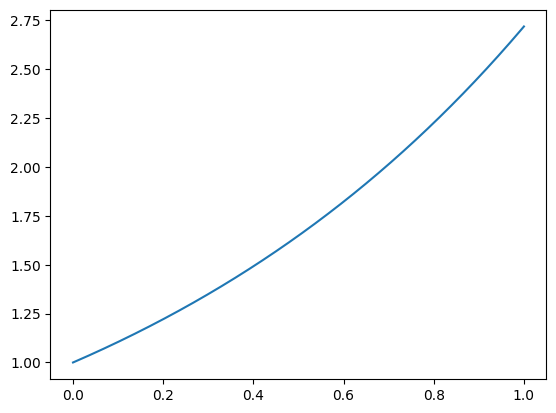

In [ ]:
t = np.arange(0, 1.001, 0.001)
plt.plot(t, f(t))

In [ ]:
def variation(dt):
  t = np.arange(0, 1+dt, dt)
  return np.abs(np.diff(f(t))).sum()

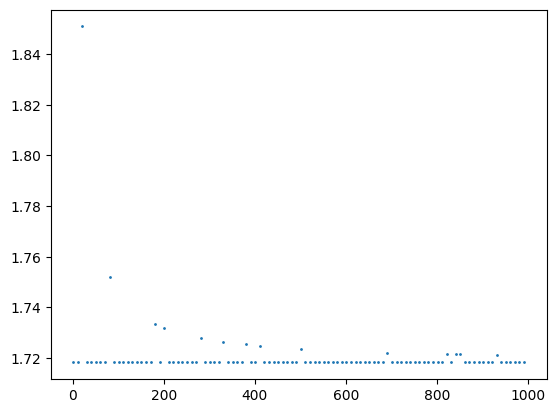

In [ ]:
plt.scatter(np.arange(1, 1000, 10), [variation(1/n) for n in np.arange(1, 1000, 10)], s = 1)

In [ ]:
# variation of a Brownian Motion
def bm_variation(dt):
  t, w = gen_bm(dt)
  return np.abs(np.diff(w)).sum()

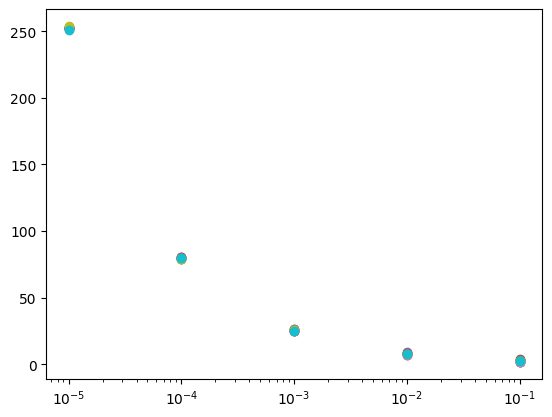

In [ ]:
# plt.scatter(np.arange(1, 10000, 10), [bm_variation(1/n) for n in np.arange(1, 10000, 10)], s = 1)
[[plt.scatter(dt, bm_variation(dt)) for _ in range(10)] for dt in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
plt.xscale('log')

Quadratic Variation

In [ ]:
def quadratic_variation(dt):
  t = np.arange(0, 1+dt, dt)
  return np.square(np.diff(f(t))).sum()

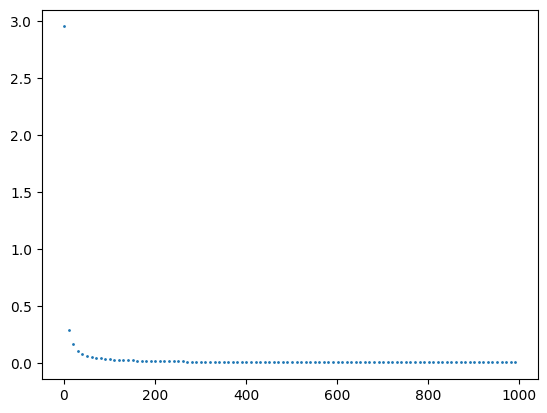

In [ ]:
plt.scatter(np.arange(1, 1000, 10), [quadratic_variation(1/n) for n in np.arange(1, 1000, 10)], s = 1)

In [ ]:
# quadratic variation of brownian motion
def bm_quadratic_variation(dt):
  t, w = gen_bm(dt, T=0.5)
  return np.square(np.diff(w)).sum()

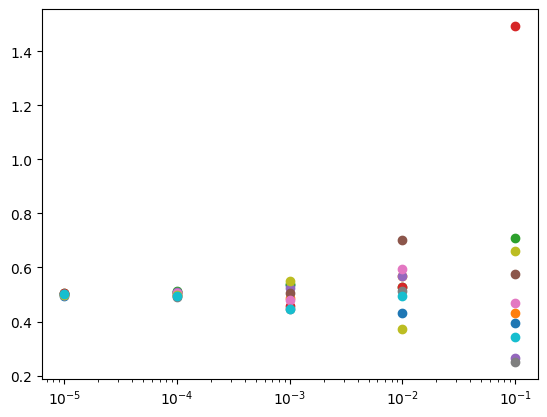

In [ ]:
[[plt.scatter(dt, bm_quadratic_variation(dt)) for _ in range(10)] for dt in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
plt.xscale('log')

Check for "Cubic Variation"

In [ ]:
# cubic variation of brownian motion
def bm_cubic_variation(dt):
  t, w = gen_bm(dt, T=1)
  return np.abs(np.power(np.diff(w), 3)).sum()

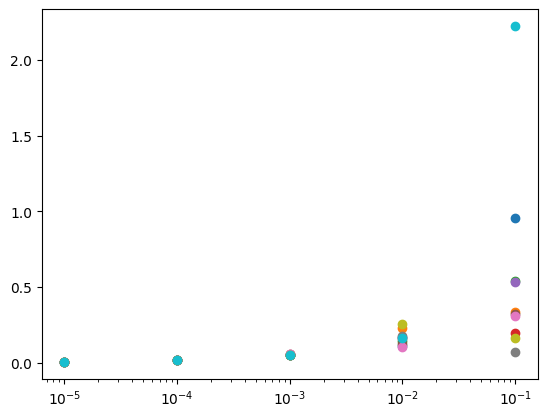

In [ ]:
[[plt.scatter(dt, bm_cubic_variation(dt)) for _ in range(10)] for dt in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
plt.xscale('log')

Processes derived from Brownian Motion

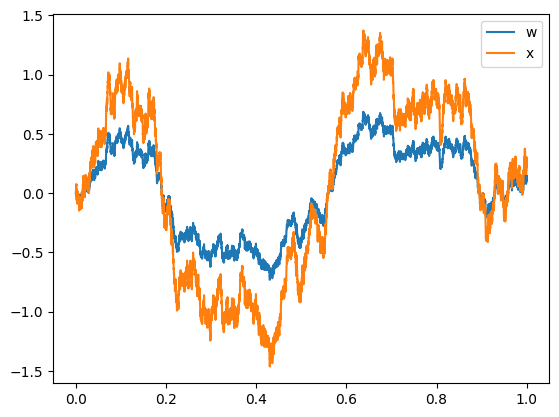

In [ ]:
# Scaled BM
t, w = gen_bm()
x = 2 * w
plt.plot(t, w, label = 'w')
plt.plot(t, x, label = 'x')
plt.legend()

A Brownian Motion with drift is a scaled Brownian Motion with a drift component. Here, we're assuming that $\sigma$ and $\mu$ are fixed.

In [ ]:
# Arithmetic BM
def gen_abm(mu = 0, sigma = 1, dt = 0.0001, T = 1):
  t, w = gen_bm(dt = dt, T = T)
  return (t, mu * t + sigma * w)

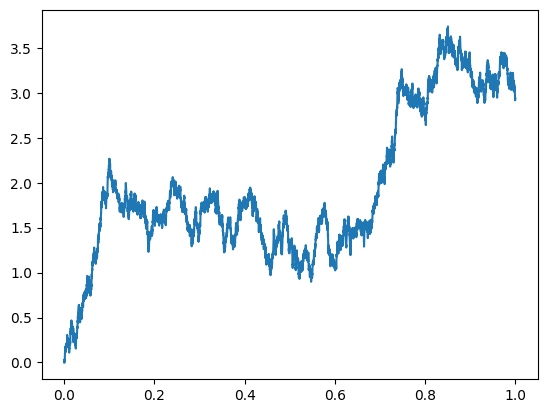

In [ ]:
t, x = gen_abm(mu = 3, sigma = 2)
plt.plot(t, x)

### Geometric Brownian Motion

Note: We're assuming that $\mu$ and $\sigma$ are constant.

In [5]:
rng = np.random.default_rng()

In [7]:
def gen_gbm(s0 = 100, T = 1, dt = 0.0001, mu = 0.10, sigma = 0.40):
  t, w = gen_bm(dt = dt, T = T)
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(1, len(s)):
    ds = mu * s[i-1] * dt + sigma * s[i-1] * (w[i]-w[i-1])
    s[i] = s[i-1] + ds
  return (t, s)

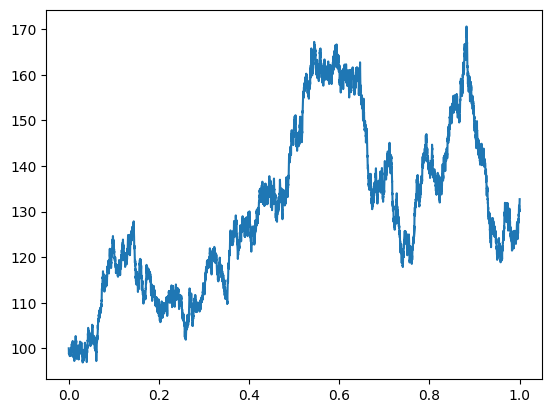

In [11]:
t, s = gen_gbm()
plt.plot(t, s)

### Endpoint Distribution of GBM

Below, we generate a GBM and then store the ending value.
Carry this out 10,000 times.

In [13]:
s_T = np.array([gen_gbm()[1][-1] for _ in range(1000)])

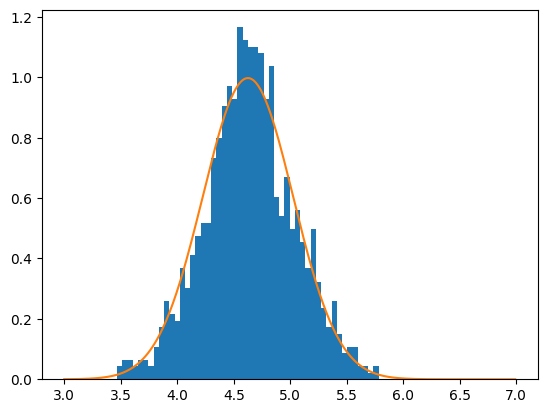

In [15]:
s0 = 100; mu = 0.10; sigma = 0.40; T = 1
plt.hist(np.log(s_T), bins = 50, density = True)
plt.plot(np.arange(3, 7, 0.01), stats.norm.pdf(np.arange(3, 7, 0.01), loc=np.log(s0) + (mu - 1/2*sigma**2)*T, scale=sigma*np.sqrt(T)))

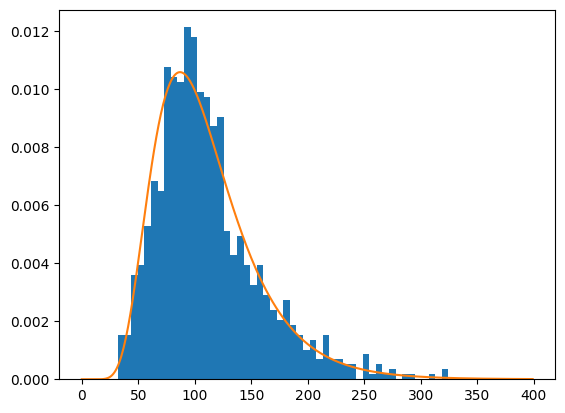

In [17]:
plt.hist(s_T, bins = 50, density = True)
plt.plot(np.arange(400), stats.lognorm.pdf(np.arange(400), scale = s0 * np.exp((mu - 1/2*sigma**2)*T), s = sigma*np.sqrt(T)))